In [38]:
import numpy as np
import mplhep as hep
import matplotlib.pyplot as plt
import uproot, os, sys, json, contextlib
import awkward as ak
# Get the notebook directory
notebook_dir = os.path.dirname(os.path.abspath("__file__"))
# Add the project root to sys.path
sys.path.append(os.path.join(notebook_dir, ".."))
from utils.branches import get_branches, truth_branches
from utils.plot import plot_data
from utils.constants import truthJpsiK, trigcut, dataPath, mcCorrPath, mcPath, truthpkk, truth
from utils.data_loader import load_data, load_mc_data
from utils.fit import load_mc_fit_params, fit_data_with_mc_constraints
from matplotlib import rcParams
import matplotlib as mpl
import ROOT
plt.style.use(hep.style.LHCb1)
config = {"mathtext.fontset":'stix'}
rcParams.update(config)



In [39]:
plt.rcParams.update({
    # Keep the font family settings for LHCb style
    "font.family": "serif",
    "font.serif": ["Times", "Computer Modern Roman", "DejaVu Serif"],
    
    # # Increase only the size-related parameters
    # "figure.figsize": (15, 10),  # Larger figure
    # "figure.dpi": 100,          # Screen display
    # "savefig.dpi": 300,         # Saved figure resolution
    
    # # # Increase font sizes while keeping LHCb style
    "font.size": 12,            # Base font size (increase from default)
    "axes.titlesize": 12,       # Title size
    "axes.labelsize": 10,       # Axis label size
    "xtick.labelsize": 12,      # X tick label size
    "ytick.labelsize": 12,      # Y tick label size
    "legend.fontsize": 10       # Legend font size
})


In [41]:
data_path = "/share/lazy/Mohamed/Bu2LambdaPPP/RD/restripped.data/reduced"
decay_modes = "L0barPKpKm"
particles = ["h1", "h2", "p"]

data_ll = load_data(
    data_path=data_path,
    decay_mode=decay_modes,
    tracks=["LL"],
    particles=particles,
    cuts=trigcut 
)

data_dd = load_data(
    data_path=data_path,
    decay_mode=decay_modes,
    tracks=["DD"],
    particles=particles,
    cuts=trigcut 
)


Real Data Files being processed for decay mode L0barPKpKm with tracks ['LL']: ['/share/lazy/Mohamed/Bu2LambdaPPP/RD/restripped.data/reduced/dataBu2L0barPHH_16MD_reduced.root:B2L0barPKpKm_LL/DecayTree', '/share/lazy/Mohamed/Bu2LambdaPPP/RD/restripped.data/reduced/dataBu2L0barPHH_16MU_reduced.root:B2L0barPKpKm_LL/DecayTree', '/share/lazy/Mohamed/Bu2LambdaPPP/RD/restripped.data/reduced/dataBu2L0barPHH_17MD_reduced.root:B2L0barPKpKm_LL/DecayTree', '/share/lazy/Mohamed/Bu2LambdaPPP/RD/restripped.data/reduced/dataBu2L0barPHH_17MU_reduced.root:B2L0barPKpKm_LL/DecayTree', '/share/lazy/Mohamed/Bu2LambdaPPP/RD/restripped.data/reduced/dataBu2L0barPHH_18MD_reduced.root:B2L0barPKpKm_LL/DecayTree', '/share/lazy/Mohamed/Bu2LambdaPPP/RD/restripped.data/reduced/dataBu2L0barPHH_18MU_reduced.root:B2L0barPKpKm_LL/DecayTree']
Branches being read: ['h1_P', 'h1_PT', 'h1_PE', 'h1_PX', 'h1_PY', 'h1_PZ', 'h1_ID', 'h1_TRACK_Type', 'h1_IPCHI2_OWNPV', 'h2_P', 'h2_PT', 'h2_PE', 'h2_PX', 'h2_PY', 'h2_PZ', 'h2_ID', '

Real Data Files being processed for decay mode L0barPKpKm with tracks ['DD']: ['/share/lazy/Mohamed/Bu2LambdaPPP/RD/restripped.data/reduced/dataBu2L0barPHH_16MD_reduced.root:B2L0barPKpKm_DD/DecayTree', '/share/lazy/Mohamed/Bu2LambdaPPP/RD/restripped.data/reduced/dataBu2L0barPHH_16MU_reduced.root:B2L0barPKpKm_DD/DecayTree', '/share/lazy/Mohamed/Bu2LambdaPPP/RD/restripped.data/reduced/dataBu2L0barPHH_17MD_reduced.root:B2L0barPKpKm_DD/DecayTree', '/share/lazy/Mohamed/Bu2LambdaPPP/RD/restripped.data/reduced/dataBu2L0barPHH_17MU_reduced.root:B2L0barPKpKm_DD/DecayTree', '/share/lazy/Mohamed/Bu2LambdaPPP/RD/restripped.data/reduced/dataBu2L0barPHH_18MD_reduced.root:B2L0barPKpKm_DD/DecayTree', '/share/lazy/Mohamed/Bu2LambdaPPP/RD/restripped.data/reduced/dataBu2L0barPHH_18MU_reduced.root:B2L0barPKpKm_DD/DecayTree']
Branches being read: ['h1_P', 'h1_PT', 'h1_PE', 'h1_PX', 'h1_PY', 'h1_PZ', 'h1_ID', 'h1_TRACK_Type', 'h1_IPCHI2_OWNPV', 'h2_P', 'h2_PT', 'h2_PE', 'h2_PX', 'h2_PY', 'h2_PZ', 'h2_ID', '

In [ ]:
mc_dd = load_mc_data(
    mc_path="/share/lazy/Mohamed/Bu2LambdaPPP/MC/DaVinciTuples/restripped.MC",
    decay_mode="L0barPKpKm",
    particles=["h1", "h2", "p"],
    additional_branches=[
        "p_MC15TuneV1_ProbNNp",
        "h1_MC15TuneV1_ProbNNk",
        "h2_MC15TuneV1_ProbNNk",
        "Bu_TRUEID"
    ],
    tracks=["DD"], # ["DD", "LL"],
    cuts=trigcut
)

mc_ll = load_mc_data(
    mc_path="/share/lazy/Mohamed/Bu2LambdaPPP/MC/DaVinciTuples/restripped.MC",
    decay_mode="L0barPKpKm",
    particles=["h1", "h2", "p"],
    additional_branches=[
        "p_MC15TuneV1_ProbNNp",
        "h1_MC15TuneV1_ProbNNk",
        "h2_MC15TuneV1_ProbNNk",
        "Bu_TRUEID"
    ],
    tracks=["LL"], # ["DD", "LL"],
    cuts=trigcut
)

MC Files being processed with trees ['DD']: ['/share/lazy/Mohamed/Bu2LambdaPPP/MC/DaVinciTuples/restripped.MC/MC16MDBu2L0barPKpKm.root:B2L0barPKpKm_DD/DecayTree', '/share/lazy/Mohamed/Bu2LambdaPPP/MC/DaVinciTuples/restripped.MC/MC16MUBu2L0barPKpKm.root:B2L0barPKpKm_DD/DecayTree', '/share/lazy/Mohamed/Bu2LambdaPPP/MC/DaVinciTuples/restripped.MC/MC17MDBu2L0barPKpKm.root:B2L0barPKpKm_DD/DecayTree', '/share/lazy/Mohamed/Bu2LambdaPPP/MC/DaVinciTuples/restripped.MC/MC17MUBu2L0barPKpKm.root:B2L0barPKpKm_DD/DecayTree', '/share/lazy/Mohamed/Bu2LambdaPPP/MC/DaVinciTuples/restripped.MC/MC18MDBu2L0barPKpKm.root:B2L0barPKpKm_DD/DecayTree', '/share/lazy/Mohamed/Bu2LambdaPPP/MC/DaVinciTuples/restripped.MC/MC18MUBu2L0barPKpKm.root:B2L0barPKpKm_DD/DecayTree']
MC Branches being read: ['h1_P', 'h1_PT', 'h1_PE', 'h1_PX', 'h1_PY', 'h1_PZ', 'h1_ID', 'h1_TRACK_Type', 'h1_IPCHI2_OWNPV', 'h2_P', 'h2_PT', 'h2_PE', 'h2_PX', 'h2_PY', 'h2_PZ', 'h2_ID', 'h2_TRACK_Type', 'h2_IPCHI2_OWNPV', 'p_P', 'p_PT', 'p_PE', 'p_

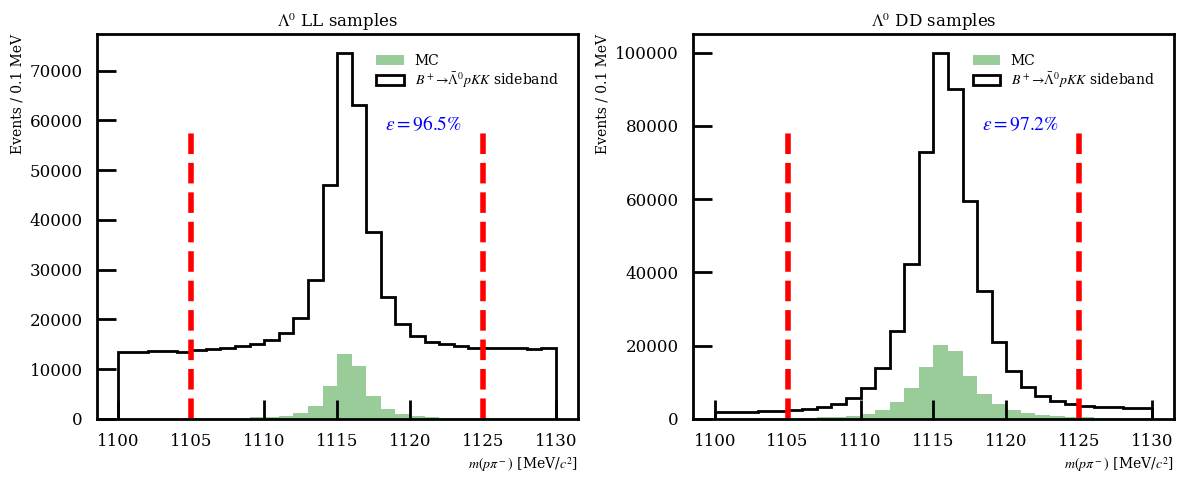

In [74]:
decay = r"$B^+\to \bar{\Lambda}^0pKK$"

# Extract the L0 mass arrays
mass_ll_data = data_ll["L0_MM"]
mass_ll_mc   = mc_ll["L0_MM"]
mass_dd_data = data_dd["L0_MM"]
mass_dd_mc   = mc_dd["L0_MM"]

# Define binning and the mass window for efficiency

# Compute efficiencies for MC
mass_ll_mc_np = ak.to_numpy(mass_ll_mc)
mass_dd_mc_np = ak.to_numpy(mass_dd_mc)

ll_in_window = (mass_ll_mc_np > mass_lower) & (mass_ll_mc_np < mass_upper)
dd_in_window = (mass_dd_mc_np > mass_lower) & (mass_dd_mc_np < mass_upper)

eff_ll = np.sum(ll_in_window) / mass_ll_mc_np.size * 100.0
eff_dd = np.sum(dd_in_window) / mass_dd_mc_np.size * 100.0

histstyle = {"range": (1100, 1130), "bins": 300}
mass_lower, mass_upper = 1105, 1125

# Plot: two subplots for LL and DD
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# LL subplot
ax1.hist(mass_ll_mc, bins=bin_edges, histtype='stepfilled', color='green', alpha=0.4,
         label='MC')
ax1.text(0.60, 0.75, fr'$\epsilon={eff_ll:.1f}\%$', transform=ax1.transAxes, 
         fontsize=14, color='blue')
ax1.hist(mass_ll_data, bins=bin_edges, histtype='step', color='black',
         label=f'{decay} sideband')
ax1.axvline(mass_lower, color='red', linestyle='--', ymin=0.0, ymax=0.75)
ax1.axvline(mass_upper, color='red', linestyle='--', ymin=0.0, ymax=0.75)
ax1.set_xlabel(r'$m(p\pi^-)$ [MeV/$c^2$]')
ax1.set_ylabel('Events / 0.1 MeV')
ax1.set_title(r'$\Lambda^0$ LL samples')
ax1.legend()

# DD subplot
ax2.hist(mass_dd_mc, bins=bin_edges, histtype='stepfilled', color='green', alpha=0.4,
         label='MC')
ax2.text(0.60, 0.75, fr'$\epsilon={eff_dd:.1f}\%$', transform=ax2.transAxes, 
         fontsize=14, color='blue')
ax2.hist(mass_dd_data, bins=bin_edges, histtype='step', color='black',
         label=f'{decay} sideband')
ax2.axvline(mass_lower, color='red', linestyle='--', ymin=0.0, ymax=0.75)
ax2.axvline(mass_upper, color='red', linestyle='--', ymin=0.0, ymax=0.75)
ax2.set_xlabel(r'$m(p\pi^-)$ [MeV/$c^2$]')
ax2.set_ylabel('Events / 0.1 MeV')
ax2.set_title(r'$\Lambda^0$ DD samples')
ax2.legend()

plt.tight_layout()
plt.savefig("ll_dd_efficiency.pdf")
plt.show()



In [79]:
def select(data, track_type='LL'):
    """
    Apply selection cuts to B+ → Λ0 h1 h2 samples incrementally
    
    Parameters:
    -----------
    data : awkward.Array
        Events data
    track_type : str
        Track type, either 'LL' (Long-Long) or 'DD' (Downstream-Downstream)
    
    Returns:
    --------
    awkward.Array
        Selected events after applying all cuts
    """
    # Keep track of initial count for reporting
    initial_count = len(data)
    
    # Apply cuts one at a time, printing progress if desired
    print(f"Initial events: {initial_count}")
    
    # ===== p (Proton) Cuts =====
    data = data[data['p_MC15TuneV1_ProbNNp'] > 0.05]
    print(f"After proton prob cut: {len(data)}/{initial_count} ({len(data)/initial_count:.2%})")
    
    # ===== Λ0 Cuts =====
    # Delta Z cut (difference between Lambda decay vertex and primary vertex)
    data = data[(data['L0_ENDVERTEX_Z'] - data['L0_OWNPV_Z']) > 20]
    print(f"After delta Z cut: {len(data)}/{initial_count} ({len(data)/initial_count:.2%})")
    
    # Lambda flight distance chi2
    try:
        data = data[data['L0_FDCHI2_OWNPV'] > 45]
    except:
        # Try alternative field name
        data = data[data['L0_FDCHI2_ORIVX'] > 45]
    print(f"After fd chi2 cut: {len(data)}/{initial_count} ({len(data)/initial_count:.2%})")
    
    # # Lambda mass window
    # data = data[(data['L0_M'] - 1115.6 < 6) & (data['L0_M'] - 1115.6 > -6)]
    # print(f"After lambda mass cut: {len(data)}/{initial_count} ({len(data)/initial_count:.2%})")
    
    # Lambda proton ProbNN
    data = data[data['Lp_MC15TuneV1_ProbNNp'] > 0.2]
    print(f"After lambda proton prob cut: {len(data)}/{initial_count} ({len(data)/initial_count:.2%})")
    
    # ===== h1 and h2 (Kaon) Cuts =====
    # KK product
    try:
        data = data[(data['h1_ProbNNk'] * data['h2_ProbNNk']) > 0.04]
    except:
        # Try alternative field names
        data = data[(data['h1_MC15TuneV1_ProbNNk'] * data['h2_MC15TuneV1_ProbNNk']) > 0.04]
    print(f"After KK product cut: {len(data)}/{initial_count} ({len(data)/initial_count:.2%})")
    
    # ===== B⁺ Cuts =====
    # B PT cut
    data = data[data['Bu_PT'] > 3000]
    print(f"After B PT cut: {len(data)}/{initial_count} ({len(data)/initial_count:.2%})")
    
    # DTF chi2 cut - only apply if the field exists
    try:
        data = data[data['Bu_DTF_chi2'] < 30]
        print(f"After DTF chi2 cut: {len(data)}/{initial_count} ({len(data)/initial_count:.2%})")
    except:
        print("Skipping DTF chi2 cut (field not found)")
    
    # Impact Parameter Chi2 - only apply if the field exists
    try:
        data = data[data['Bu_IPCHI2_OWNPV'] < 10]
        print(f"After IP chi2 cut: {len(data)}/{initial_count} ({len(data)/initial_count:.2%})")
    except:
        print("Skipping IP chi2 cut (field not found)")
    
    # Flight Distance Chi2 - only apply if the field exists
    try:
        data = data[data['Bu_FDCHI2_OWNPV'] > 175]
        print(f"After B FD chi2 cut: {len(data)}/{initial_count} ({len(data)/initial_count:.2%})")
    except:
        print("Skipping B FD chi2 cut (field not found)")
    
    print(f"Final selected events: {len(data)}/{initial_count} ({len(data)/initial_count:.2%})")
    return data

In [80]:
data_selection_ll = select(data_ll, track_type='LL')
data_selection_dd = select(data_dd, track_type='DD')

Initial events: 713632
After proton prob cut: 713632/713632 (100.00%)
After delta Z cut: 629470/713632 (88.21%)
After fd chi2 cut: 572658/713632 (80.25%)
After lambda proton prob cut: 402857/713632 (56.45%)
After KK product cut: 402857/713632 (56.45%)
After B PT cut: 402857/713632 (56.45%)
After DTF chi2 cut: 402857/713632 (56.45%)
After IP chi2 cut: 402857/713632 (56.45%)
After B FD chi2 cut: 402857/713632 (56.45%)
Final selected events: 402857/713632 (56.45%)
Initial events: 561928
After proton prob cut: 561928/561928 (100.00%)
After delta Z cut: 561873/561928 (99.99%)
After fd chi2 cut: 529917/561928 (94.30%)
After lambda proton prob cut: 489652/561928 (87.14%)
After KK product cut: 489652/561928 (87.14%)
After B PT cut: 489652/561928 (87.14%)
After DTF chi2 cut: 489652/561928 (87.14%)
After IP chi2 cut: 489652/561928 (87.14%)
After B FD chi2 cut: 489652/561928 (87.14%)
Final selected events: 489652/561928 (87.14%)


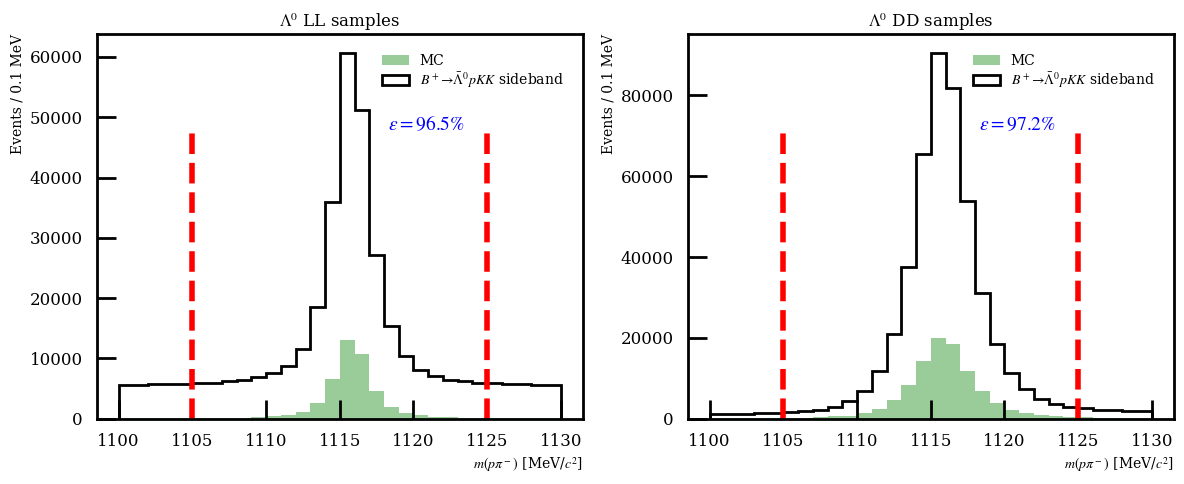

In [81]:
decay = r"$B^+\to \bar{\Lambda}^0pKK$"

# Extract the L0 mass arrays
mass_ll_data = data_selection_ll["L0_MM"]
mass_ll_mc   = mc_ll["L0_MM"]
mass_dd_data = data_selection_dd["L0_MM"]
mass_dd_mc   = mc_dd["L0_MM"]

# Define binning and the mass window for efficiency

# Compute efficiencies for MC
mass_ll_mc_np = ak.to_numpy(mass_ll_mc)
mass_dd_mc_np = ak.to_numpy(mass_dd_mc)

ll_in_window = (mass_ll_mc_np > mass_lower) & (mass_ll_mc_np < mass_upper)
dd_in_window = (mass_dd_mc_np > mass_lower) & (mass_dd_mc_np < mass_upper)

eff_ll = np.sum(ll_in_window) / mass_ll_mc_np.size * 100.0
eff_dd = np.sum(dd_in_window) / mass_dd_mc_np.size * 100.0

histstyle = {"range": (1100, 1130), "bins": 300}
mass_lower, mass_upper = 1105, 1125

# Plot: two subplots for LL and DD
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# LL subplot
ax1.hist(mass_ll_mc, bins=bin_edges, histtype='stepfilled', color='green', alpha=0.4,
         label='MC')
ax1.text(0.60, 0.75, fr'$\epsilon={eff_ll:.1f}\%$', transform=ax1.transAxes, 
         fontsize=14, color='blue')
ax1.hist(mass_ll_data, bins=bin_edges, histtype='step', color='black',
         label=f'{decay} sideband')
ax1.axvline(mass_lower, color='red', linestyle='--', ymin=0.0, ymax=0.75)
ax1.axvline(mass_upper, color='red', linestyle='--', ymin=0.0, ymax=0.75)
ax1.set_xlabel(r'$m(p\pi^-)$ [MeV/$c^2$]')
ax1.set_ylabel('Events / 0.1 MeV')
ax1.set_title(r'$\Lambda^0$ LL samples')
ax1.legend()

# DD subplot
ax2.hist(mass_dd_mc, bins=bin_edges, histtype='stepfilled', color='green', alpha=0.4,
         label='MC')
ax2.text(0.60, 0.75, fr'$\epsilon={eff_dd:.1f}\%$', transform=ax2.transAxes, 
         fontsize=14, color='blue')
ax2.hist(mass_dd_data, bins=bin_edges, histtype='step', color='black',
         label=f'{decay} sideband')
ax2.axvline(mass_lower, color='red', linestyle='--', ymin=0.0, ymax=0.75)
ax2.axvline(mass_upper, color='red', linestyle='--', ymin=0.0, ymax=0.75)
ax2.set_xlabel(r'$m(p\pi^-)$ [MeV/$c^2$]')
ax2.set_ylabel('Events / 0.1 MeV')
ax2.set_title(r'$\Lambda^0$ DD samples')
ax2.legend()

plt.tight_layout()
plt.savefig("ll_dd_efficiency.pdf")
plt.show()

